### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import _hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("2017.csv")

In [3]:
df

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28
...,...,...,...,...,...,...,...,...,...
45223,Spain,12539.0,493393,1.95,21928,10,2017,12,20
45224,Spain,12539.0,493393,1.25,22097,12,2017,12,20
45225,Spain,12539.0,493393,1.95,21929,10,2017,12,20
45226,Spain,12539.0,493393,4.95,22278,6,2017,12,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45228 entries, 0 to 45227
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       45228 non-null  object 
 1   customer_id   31760 non-null  float64
 2   invoice       45228 non-null  object 
 3   price         45228 non-null  float64
 4   stream_id     45228 non-null  object 
 5   times_viewed  45228 non-null  int64  
 6   year          45228 non-null  int64  
 7   month         45228 non-null  int64  
 8   day           45228 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
df.describe(include='all')

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
count,45228,31760.000000,45228,45228.000000,45228,45228.000000,45228.0,45228.000000,45228.000000
unique,24,NaN,2330,NaN,3141,NaN,NaN,NaN,NaN
top,United Kingdom,NaN,490074,NaN,85123A,NaN,NaN,NaN,NaN
freq,42857,NaN,580,NaN,327,NaN,NaN,NaN,NaN
mean,NaN,15464.516908,NaN,4.384624,NaN,4.643562,2017.0,11.789909,13.538428
std,NaN,1664.830594,NaN,21.654369,NaN,4.905729,0.0,0.407378,9.213272
min,NaN,12346.000000,NaN,0.000000,NaN,0.000000,2017.0,11.000000,1.000000
25%,NaN,14087.000000,NaN,1.250000,NaN,1.000000,2017.0,12.000000,6.000000
50%,NaN,15503.000000,NaN,2.570000,NaN,2.000000,2017.0,12.000000,12.000000
75%,NaN,16918.000000,NaN,4.950000,NaN,6.000000,2017.0,12.000000,19.000000


In [6]:
df.shape

(45228, 9)

In [7]:
df.columns

Index(['country', 'customer_id', 'invoice', 'price', 'stream_id', 'times_viewed', 'year', 'month', 'day'], dtype='object')

In [8]:
df[df['price'] == 1998.49] #Outlier

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
7309,United Kingdom,15482.0,C490129,1998.49,M,1,2017,11,30


### Data Visualization

### Univariate Data Exploration

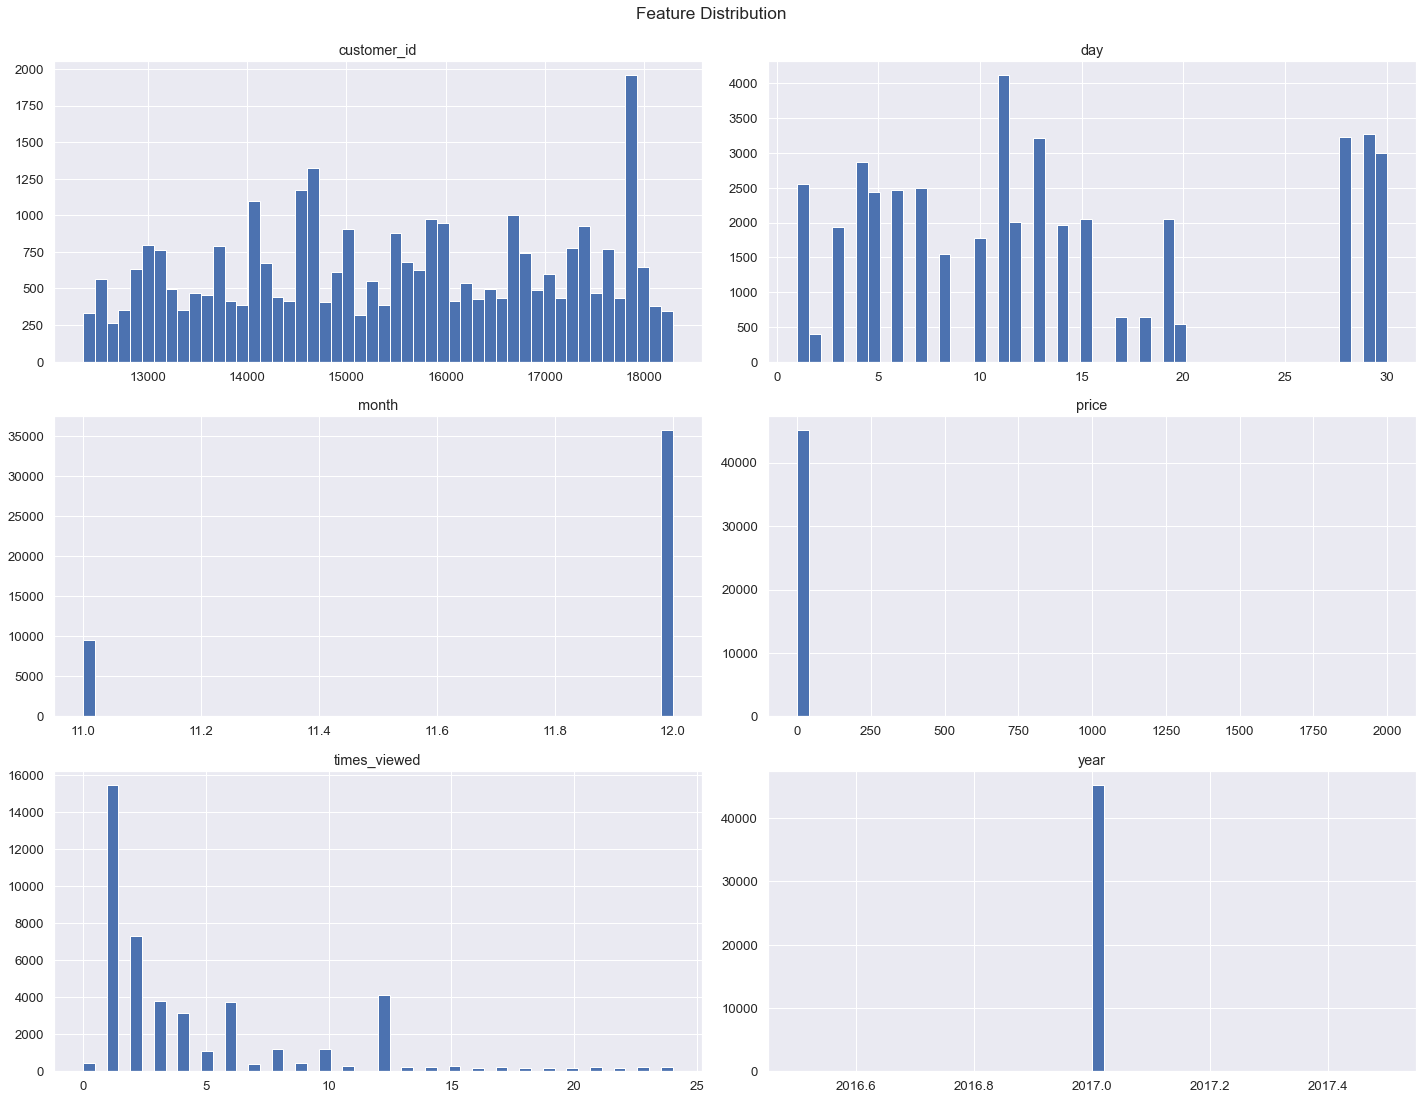

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

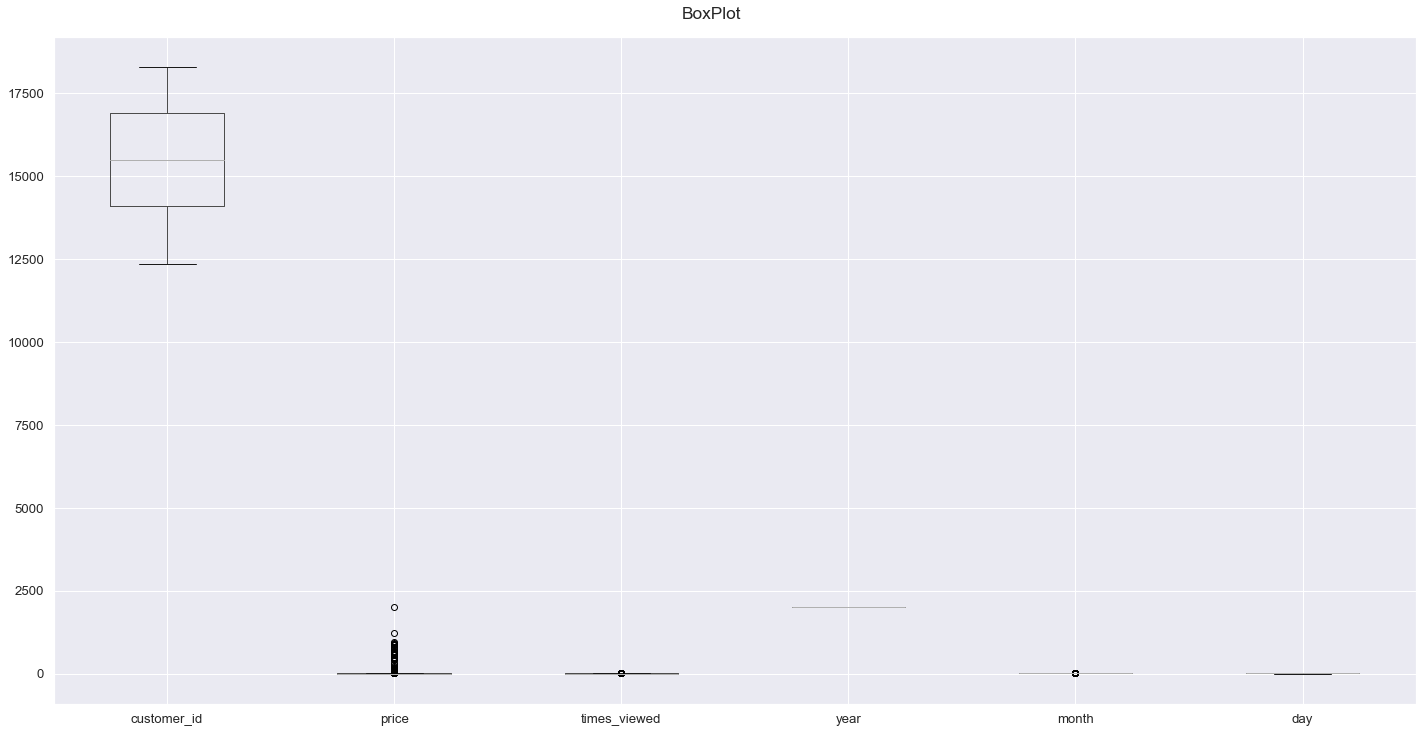

In [10]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

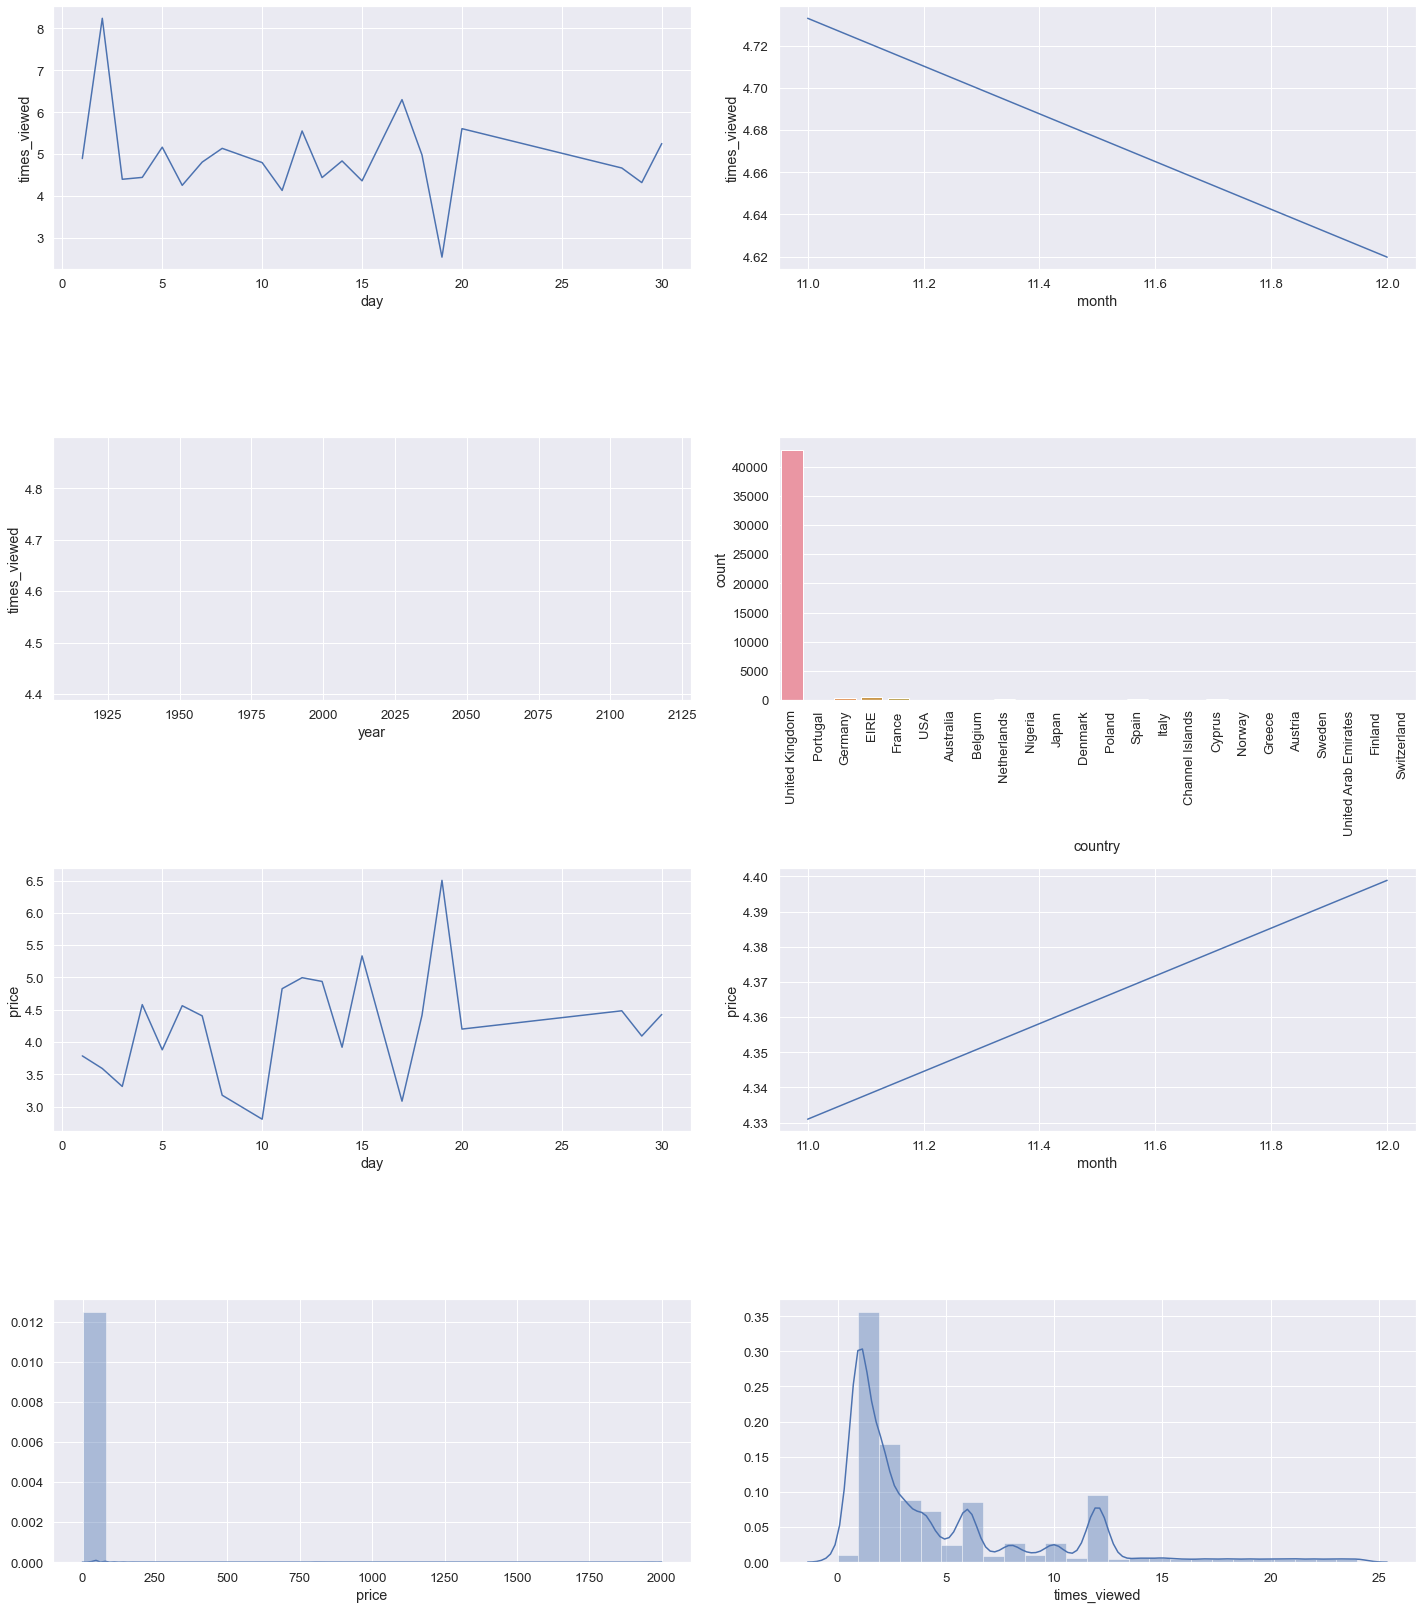

In [11]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("")
sns.lineplot(x="day",y="times_viewed",data=df,ci=None)

plt.subplot(7,2,2)
plt.title("")
sns.lineplot(x="month",y="times_viewed",data=df,ci=None)

plt.subplot(7,2,3)
plt.title("")
sns.lineplot(x="year",y="times_viewed",data=df,ci=None)

plt.subplot(7,2,4)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(x="country",data=df)

plt.subplot(7,2,5)
plt.title("")
sns.lineplot(x="day",y="price",data=df,ci=None)

plt.subplot(7,2,6)
plt.title("")
sns.lineplot(x="month",y="price",data=df,ci=None)

plt.subplot(7,2,7)
plt.title("")
sns.distplot(a=df["price"],bins=25)

plt.subplot(7,2,8)
plt.title("")
sns.distplot(a=df["times_viewed"],bins=25)



plt.tight_layout()
plt.show()

### Bivariate Data Exploration

In [12]:
# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# plt.show()

### Correlation

In [13]:
df.corr()

,customer_id,price,times_viewed,year,month,day
customer_id,1.000000,-0.013084,-0.116419,NaN,-0.016638,0.003640
price,-0.013084,1.000000,-0.072564,NaN,0.001278,0.008187
times_viewed,-0.116419,-0.072564,1.000000,NaN,-0.009392,-0.011896
year,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.016638,0.001278,-0.009392,NaN,1.000000,-0.864184
day,0.003640,0.008187,-0.011896,NaN,-0.864184,1.000000


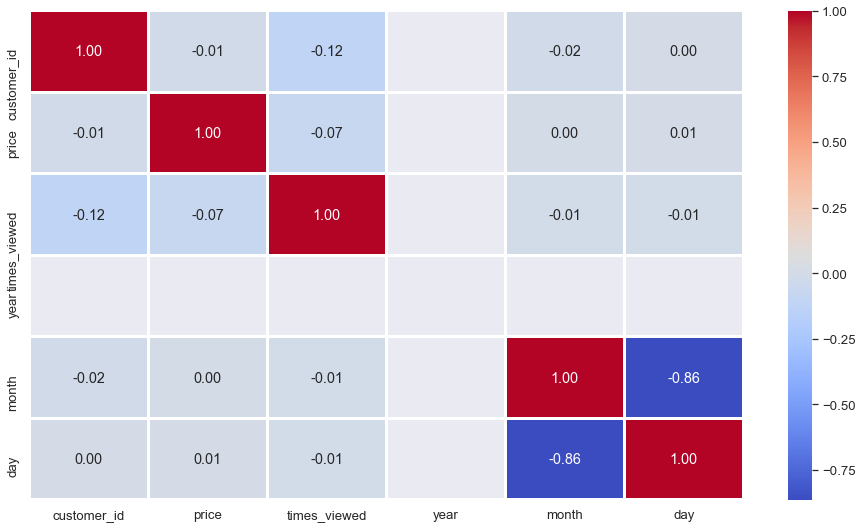

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

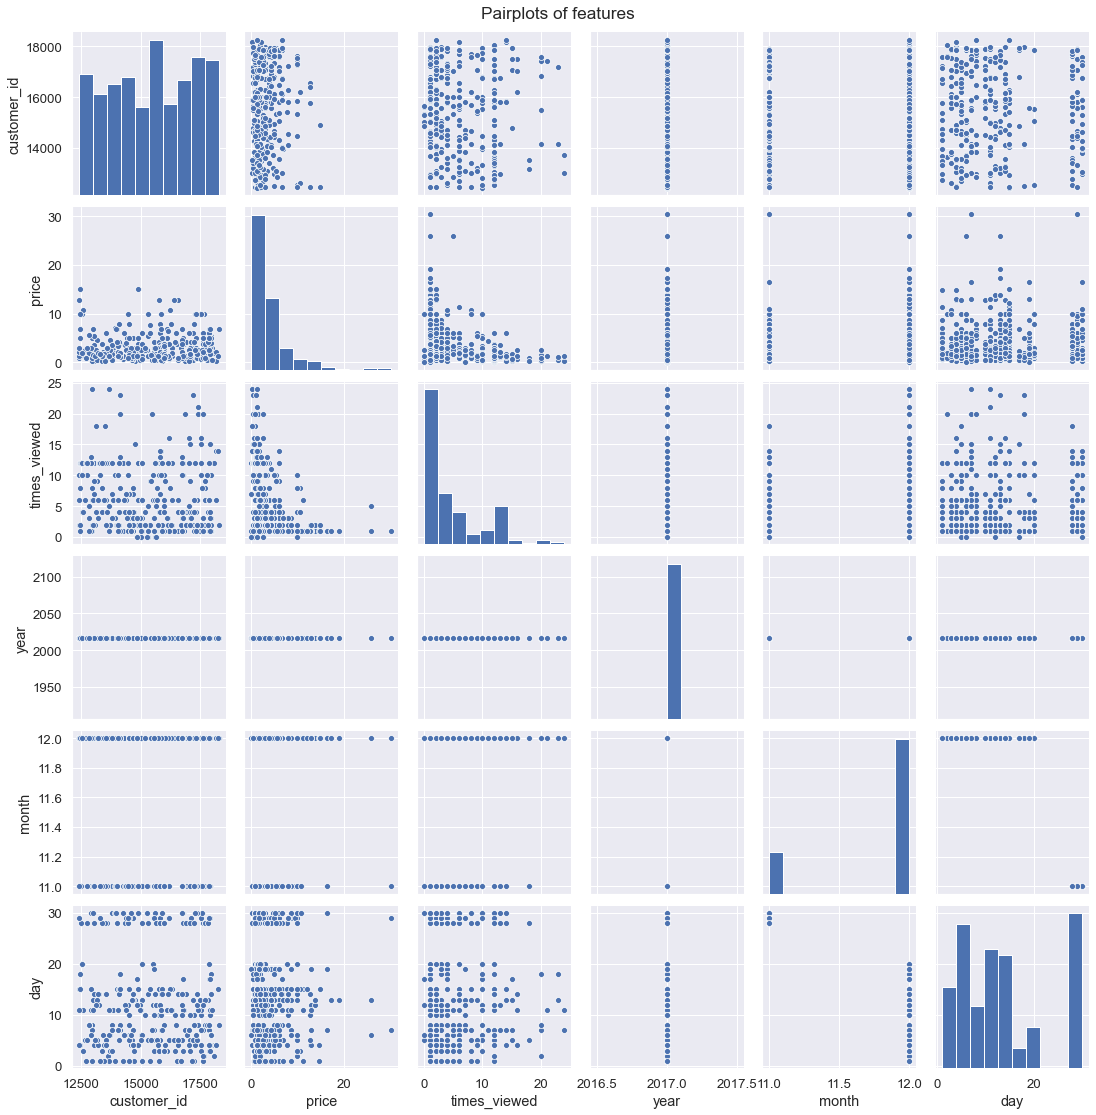

In [15]:
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

### Drop unwanted features

In [16]:
df.columns

Index(['country', 'customer_id', 'invoice', 'price', 'stream_id', 'times_viewed', 'year', 'month', 'day'], dtype='object')

In [17]:
df.drop(['country', 'customer_id','invoice','stream_id','year'],axis=1,inplace=True)

In [18]:
df

,price,times_viewed,month,day
0,6.95,12,11,28
1,8.65,1,11,28
2,1.70,6,11,28
3,1.70,4,11,28
4,0.87,1,11,28
...,...,...,...,...
45223,1.95,10,12,20
45224,1.25,12,12,20
45225,1.95,10,12,20
45226,4.95,6,12,20


### Treat Missing Values

In [19]:
df.isnull().sum()

price           0
times_viewed    0
month           0
day             0
dtype: int64

### Treat Duplicate Values

In [20]:
df.duplicated(keep='first').sum()

35865

In [21]:
df[df.duplicated(keep=False)] #Check duplicate values

,price,times_viewed,month,day
0,6.95,12,11,28
1,8.65,1,11,28
2,1.70,6,11,28
3,1.70,4,11,28
4,0.87,1,11,28
...,...,...,...,...
45223,1.95,10,12,20
45224,1.25,12,12,20
45225,1.95,10,12,20
45226,4.95,6,12,20


### Treat Outliers

In [22]:
df.describe()

,price,times_viewed,month,day
count,45228.000000,45228.000000,45228.000000,45228.000000
mean,4.384624,4.643562,11.789909,13.538428
std,21.654369,4.905729,0.407378,9.213272
min,0.000000,0.000000,11.000000,1.000000
25%,1.250000,1.000000,12.000000,6.000000
50%,2.570000,2.000000,12.000000,12.000000
75%,4.950000,6.000000,12.000000,19.000000
max,1998.490000,24.000000,12.000000,30.000000


In [23]:
windsorizer = Winsorizer(distribution='skewed',tail='right',fold=3, variables=['price'])

In [24]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', variables=['price'])

In [25]:
df2 = windsorizer.transform(df)

In [26]:
df2

,price,times_viewed,month,day
0,6.95,12,11,28
1,8.65,1,11,28
2,1.70,6,11,28
3,1.70,4,11,28
4,0.87,1,11,28
...,...,...,...,...
45223,1.95,10,12,20
45224,1.25,12,12,20
45225,1.95,10,12,20
45226,4.95,6,12,20


In [27]:
df2.describe()

,price,times_viewed,month,day
count,45228.000000,45228.000000,45228.000000,45228.000000
mean,3.675710,4.643562,11.789909,13.538428
std,3.312637,4.905729,0.407378,9.213272
min,0.000000,0.000000,11.000000,1.000000
25%,1.250000,1.000000,12.000000,6.000000
50%,2.570000,2.000000,12.000000,12.000000
75%,4.950000,6.000000,12.000000,19.000000
max,16.050000,24.000000,12.000000,30.000000


In [28]:
windsorizer.left_tail_caps_

{}

In [29]:
windsorizer.right_tail_caps_

{'price': 16.05}

### Treat Data Types

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45228 entries, 0 to 45227
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         45228 non-null  float64
 1   times_viewed  45228 non-null  int64  
 2   month         45228 non-null  int64  
 3   day           45228 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 MB


### Create and save processed dataset

In [31]:
#df2.to_csv("2017train.csv",index=False)

### Train Test Split

In [32]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [33]:
X.values, y.values

(array([[12, 11, 28],
        [ 1, 11, 28],
        [ 6, 11, 28],
        ...,
        [10, 12, 20],
        [ 6, 12, 20],
        [ 6, 12, 20]], dtype=int64),
 array([6.95, 8.65, 1.7 , ..., 1.95, 4.95, 2.55]))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36182, 3), (9046, 3), (36182,), (9046,))

### Feature Scaling

In [36]:
X_train

array([[10, 11, 30],
       [12, 12,  4],
       [ 2, 11, 30],
       ...,
       [ 3, 12, 18],
       [ 9, 12, 19],
       [ 1, 11, 28]], dtype=int64)

In [37]:
X_test

array([[ 1, 12, 11],
       [ 3, 12,  4],
       [ 1, 12,  3],
       ...,
       [ 0, 11, 29],
       [ 2, 12, 14],
       [ 3, 12, 13]], dtype=int64)

In [38]:
y_train

array([1.95, 0.42, 2.57, ..., 4.25, 6.04, 3.45])

In [39]:
y_test

array([ 3.75,  0.85,  3.75, ..., 16.05,  2.95,  4.3 ])

### Model Training

### Using PyCaret

In [40]:
exp_reg = setup(data = df2, target = 'price', session_id=0, normalize=False, train_size=0.8) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,0
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(45228, 4)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [41]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2.1880,9.4334,3.0708,0.1308,0.5859,1.1762,0.4621
1,Light Gradient Boosting Machine,2.1883,9.4391,3.0717,0.1302,0.5859,1.1737,0.1615
2,CatBoost Regressor,2.1889,9.4441,3.0725,0.1298,0.5863,1.1745,5.2659
3,Extreme Gradient Boosting,2.1957,9.4884,3.0796,0.1257,0.5888,1.1777,0.6613
4,Random Forest,2.1964,9.4897,3.0799,0.1256,0.5890,1.1771,0.4049
5,Extra Trees Regressor,2.1975,9.5013,3.0817,0.1246,0.5898,1.1768,0.3636
6,Decision Tree,2.1977,9.5035,3.0821,0.1244,0.5900,1.1766,0.0091
7,Linear Regression,2.2557,9.7624,3.1238,0.1006,0.6060,1.2370,0.0031
8,Ridge Regression,2.2557,9.7624,3.1238,0.1006,0.6060,1.2370,0.0062
9,Least Angle Regression,2.2557,9.7624,3.1238,0.1006,0.6060,1.2370,0.0078


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
gb = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1272,8.8799,2.9799,0.1368,0.5771,1.1783
1,2.1504,9.2024,3.0336,0.1562,0.5771,1.2188
2,2.2092,9.9523,3.1547,0.1435,0.5803,1.1508
3,2.1585,9.0282,3.0047,0.1250,0.5826,1.1791
4,2.2103,9.5507,3.0904,0.1143,0.5885,1.1766
5,2.1533,9.1546,3.0257,0.1394,0.5887,1.1685
6,2.2409,9.9042,3.1471,0.1238,0.5890,1.1515
7,2.1909,9.2126,3.0352,0.1220,0.5932,1.1969
8,2.2403,9.8461,3.1378,0.1313,0.5908,1.1474
9,2.1995,9.6031,3.0989,0.1155,0.5914,1.1935


In [43]:
print(gb)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [44]:
tuned_gbr = tune_model(gb, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1452,8.9810,2.9968,0.1269,0.5813,1.1818
1,2.1461,9.2151,3.0356,0.1550,0.5756,1.1841
2,2.2517,10.2156,3.1962,0.1208,0.5930,1.1801
3,2.1753,9.0710,3.0118,0.1209,0.5893,1.1979
4,2.2414,9.8245,3.1344,0.0889,0.5976,1.1844
5,2.1615,9.2489,3.0412,0.1306,0.5939,1.1711
6,2.2452,9.9910,3.1609,0.1161,0.5927,1.1419
7,2.2127,9.4117,3.0679,0.1030,0.6033,1.2199
8,2.2631,10.0106,3.1640,0.1168,0.5987,1.1590
9,2.2085,9.6304,3.1033,0.1130,0.5944,1.1876


In [45]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.37, loss='ls',
                          max_depth=90, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=9, min_weight_fraction_leaf=0.0,
                          n_estimators=130, n_iter_no_change=None,
                          presort='deprecated', random_state=0, subsample=0.5,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)


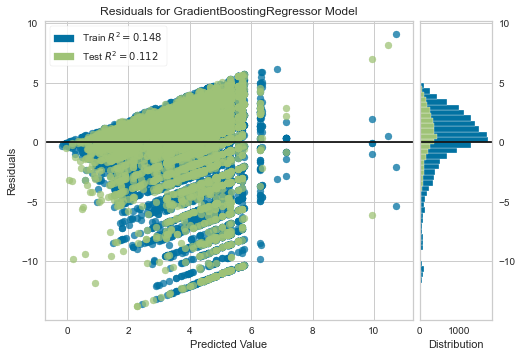

In [46]:
plot_model(tuned_gbr)

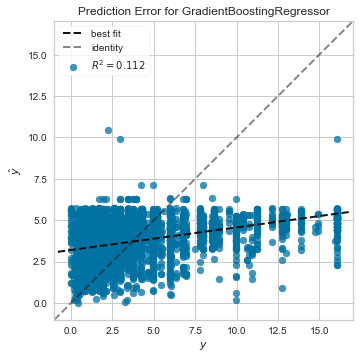

In [47]:
plot_model(tuned_gbr, plot = 'error')

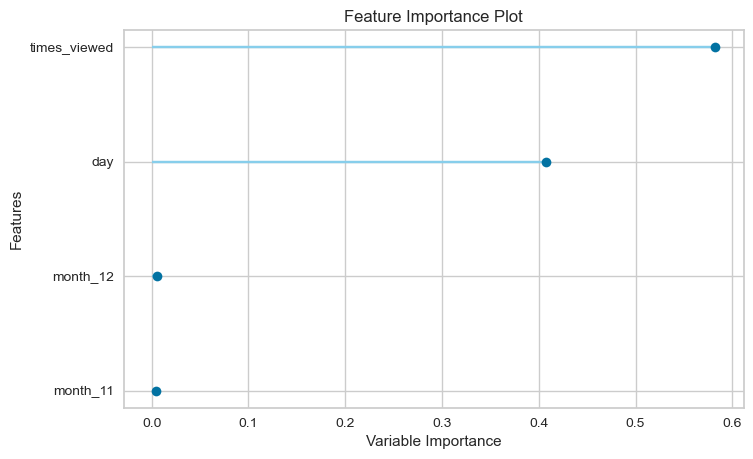

In [48]:
plot_model(tuned_gbr, plot='feature')

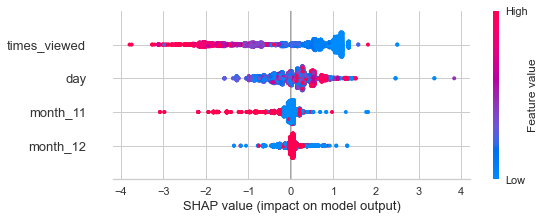

In [49]:
interpret_model(tuned_gbr)

In [50]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [51]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.2104,9.5037,3.0828,0.1123,0.5964,1.1881


,times_viewed,day,month_11,month_12,price,Label
0,1.0,1.0,0.0,1.0,5.17,4.3430
1,1.0,4.0,0.0,1.0,2.57,4.8145
2,1.0,18.0,0.0,1.0,0.42,3.9994
3,0.0,14.0,0.0,1.0,0.85,4.0447
4,1.0,1.0,0.0,1.0,3.75,4.3430
...,...,...,...,...,...,...
4518,1.0,4.0,0.0,1.0,7.78,4.8145
4519,12.0,13.0,0.0,1.0,2.95,1.8580
4520,6.0,5.0,0.0,1.0,2.10,3.2367
4521,1.0,13.0,0.0,1.0,2.57,5.2172


In [52]:
final_gbr = finalize_model(tuned_gbr)